In [30]:
pip install pmdarima


In [31]:
import pandas as pd
import numpy as np


In [32]:
df=pd.read_csv('/content/archive (1).zip',index_col='DATE'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


<Axes: xlabel='DATE'>

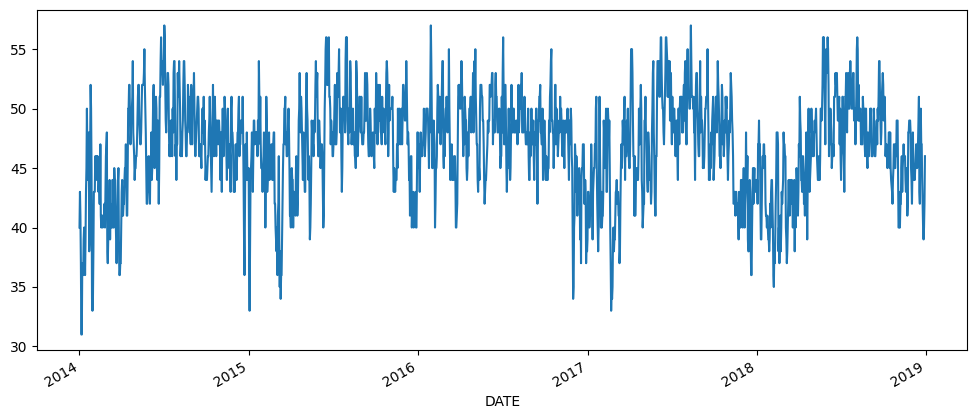

In [33]:
df['AvgTemp'].plot(figsize=(12,5))

In [34]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [35]:
ad_test(df['AvgTemp'])

1. ADF :  -6.554680125068777
2. P-Value :  8.675937480199653e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [36]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [15]:
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.735, Time=6.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.44 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.90 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.311, Time=5.19 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.337, Time=3.95 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=3.77 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.577, Time=5.81 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.293, Time=6.33 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.620, Time=6.75 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.228, Time=5.12 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.517
Date:                Wed, 21 Feb 2024   AIC                           8295.034
Time:                        08:28:26   BIC                           8339.092
Sample:                             0   HQIC                          8311.288
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2070      0.362      3.335      0.001       0.498       1.916
ar.L1          0.9739      0.008    124.621      0.000       0.959       0.989
ma.L1         -0.1246      0.024     -5.256      0.000      -0.171      -0.078
ma.L2         -0.2196      0.024     -9.115      0.000      -0.267      -0.172
ma.L3         -0.2056      0.024     -8.615      0.000      -0.252      -0.159
ma.L4         -0.1373      0.023     -6.034      0.000      -0.182      -0.093
ma.L5         -0.0476      0.024     -1.952      0.051      -0.095       0.000
sigma2         5.4981      0.172     31.952      0.000       5.161       5.835
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.20
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
from statsmodels.tsa.arima.model import ARIMA


In [39]:
pip install --upgrade statsmodels


In [40]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [41]:
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Wed, 21 Feb 2024   AIC                           8156.395
Time:                        08:44:17   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
start=len(train)
end=len(train)+len(test)-1
#pred=model.predict(start=start,end=end,typ='levels')
#print(pred)
pred.index=df.index[start:end+1]
print(pred)

DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721545
2018-12-05    45.863733
2018-12-06    45.874126
2018-12-07    45.884370
2018-12-08    45.894466
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923891
2018-12-12    45.933418
2018-12-13    45.942808
2018-12-14    45.952063
2018-12-15    45.961185
2018-12-16    45.970175
2018-12-17    45.979036
2018-12-18    45.987769
2018-12-19    45.996377
2018-12-20    46.004861
2018-12-21    46.013222
2018-12-22    46.021463
2018-12-23    46.029586
2018-12-24    46.037591
2018-12-25    46.045481
2018-12-26    46.053258
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075922
2018-12-30    46.083261
Name: predicted_mean, dtype: float64


<Axes: xlabel='DATE'>

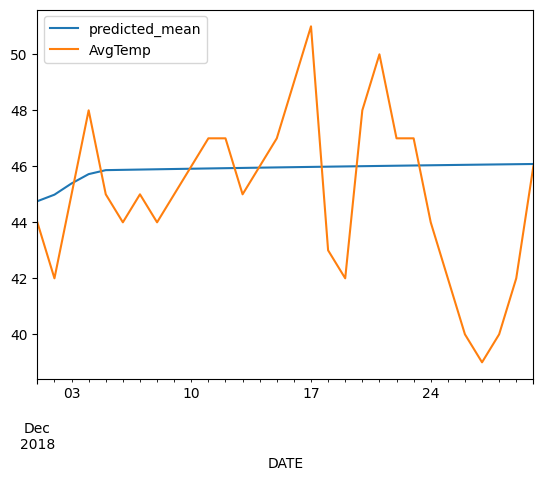

In [45]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [46]:
test['AvgTemp'].mean()

45.0

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000463825206671


In [49]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [54]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
#pred.index=index_future_dates
print(pred)

1821    46.418166
1822    46.113912
1823    45.617874
1824    45.249566
1825    45.116916
1826    45.136666
1827    45.156140
1828    45.175341
1829    45.194274
1830    45.212942
1831    45.231349
1832    45.249498
1833    45.267394
1834    45.285038
1835    45.302436
1836    45.319591
1837    45.336505
1838    45.353183
1839    45.369628
1840    45.385842
1841    45.401830
1842    45.417593
1843    45.433137
1844    45.448462
1845    45.463574
1846    45.478474
1847    45.493165
1848    45.507651
1849    45.521934
1850    45.536017
1851    45.549904
Name: ARIMA Predictions, dtype: float64


<Axes: >

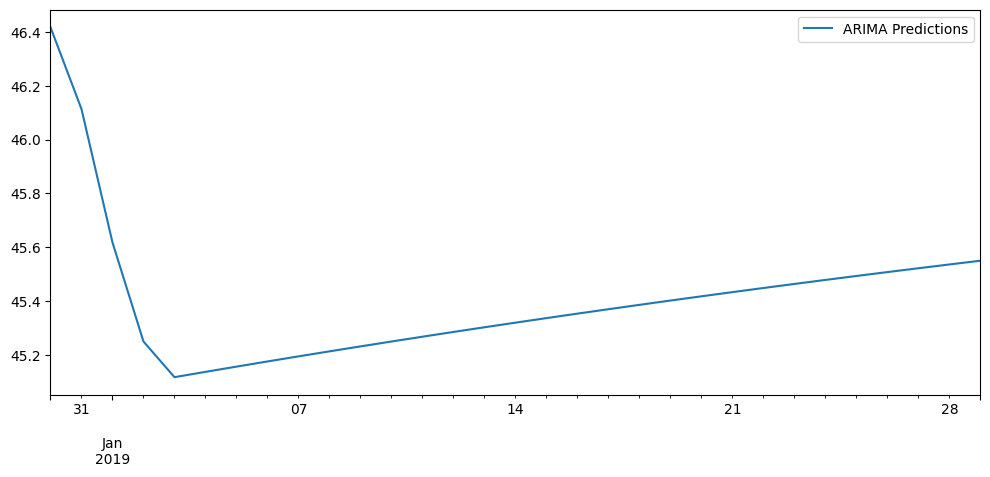

In [53]:
pred.plot(figsize=(12,5),legend=True)